In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_excel('dsa_sqr_200417.xlsx', header=1) #header indicate the row where they are

In [15]:
df.head()

,Search term,Ad group,Campaign,Added/Excluded,Dynamically generated Headline,Categories,Landing Page Title,URL,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate,All conv.,URLtype,URL Cat
0,kreta santorin,DSA - Brand,German - Generic (DSA),None,Unabhängiger Tagesausflug zur Insel Santorin v...,griechenland\ngriechenland/kreta,Unabhängiger Tagesausflug zur Insel Santorin v...,https://www.viatorcom.de/de/7132/tours/Herakli...,3,30,0.1000,0.20,0.61,0,0.0,0.0,0,d961-2462SANT,Product
1,stadtrundfahrt montreal,DSA - Brand,German - Generic (DSA),None,"Montreal Sehenswürdigkeiten &amp; Aktivitäten,...",kanada\nkanada/québec\nkanada/québec/montreal,Die 10 Besten Montreal Sehenswürdigkeiten & Ak...,https://www.viatorcom.de/de/7132/Montreal/d625...,1,1,1.0000,0.07,0.07,0,0.0,0.0,0,d625-ttd,TTD
2,hanoi halong tours,DSA - Brand,German - Generic (DSA),None,3-tägige Dschunken-Bootsfahrt in der Halong-Bu...,vietnam,3-tägige Dschunken-Bootsfahrt in der Halong-Bu...,https://www.viatorcom.de/de/7132/tours/Hanoi/H...,1,1,1.0000,1.02,1.02,0,0.0,0.0,0,d351-2514HAN_HBJ3DD,Product
3,kochkurs barcelona,DSA - Brand,German - Generic (DSA),None,Die 10 Besten Barcelona Kochkurse - viatorcom.de,spanien\nspanien/katalonien\nspanien/katalonie...,Die 10 Besten Barcelona Kochkurse,https://www.viatorcom.de/de/7132/Barcelona-tou...,4,12,0.3333,0.06,0.25,0,0.0,0.0,0,d562-g6-c19,Group/Category
4,reisen zum chinesiche mauer,DSA - Brand,German - Generic (DSA),None,Chinesische Mauer - Tagesausflug in kleiner Gr...,china,Chinesische Mauer - Tagesausflug in kleiner Gr...,https://www.viatorcom.de/de/7132/tours/Beijing...,1,1,1.0000,0.39,0.39,0,0.0,0.0,0,d321-5262CNUD,Product


# Code to parse URLs and categorise by type

In [9]:
def parseUrl (url):
    arr = url.split('/')
    if len(arr[len(arr)-1]) == 1:
        return arr[len(arr)-2]
    else:
        return arr[len(arr)-1]

In [10]:
def categorise (url):
    if '-ttd' in url:
        return 'TTD'
    elif '-t' in url:
        return 'Recommendation'
    elif '-g' in url:
        return 'Group/Category'
    elif '-a' in url:
        return 'Attraction'
    elif '-' not in url:
        return 'TTD'
    else:
        return 'Product'

In [11]:
df['URLtype'] = df['URL'].apply(parseUrl)
df['URL Cat'] = df['URLtype'].apply(categorise)

In [18]:
df['Cat1'] = df['Categories'].apply(parseCat)

In [19]:
sqr = df[['Search term','Impressions', 'Clicks' ,'Conversions', 'Cost', 'URL', 'URL Cat', 'Cat1']]

In [20]:
sqr.head()

,Search term,Impressions,Clicks,Conversions,Cost,URL,URL Cat,Cat1
0,kreta santorin,30,3,0,0.61,https://www.viatorcom.de/de/7132/tours/Herakli...,Product,griechenland
1,stadtrundfahrt montreal,1,1,0,0.07,https://www.viatorcom.de/de/7132/Montreal/d625...,TTD,kanada
2,hanoi halong tours,1,1,0,1.02,https://www.viatorcom.de/de/7132/tours/Hanoi/H...,Product,vietnam
3,kochkurs barcelona,12,4,0,0.25,https://www.viatorcom.de/de/7132/Barcelona-tou...,Group/Category,spanien
4,reisen zum chinesiche mauer,1,1,0,0.39,https://www.viatorcom.de/de/7132/tours/Beijing...,Product,china


In [21]:
summary = sqr.groupby('URL Cat').sum()

In [22]:
summary['CPA'] = summary['Cost']/summary['Conversions']
summary['CVR'] = summary['Conversions']/summary['Clicks']

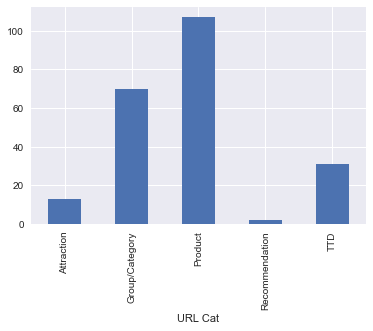

In [23]:
summary['Conversions'].plot.bar()

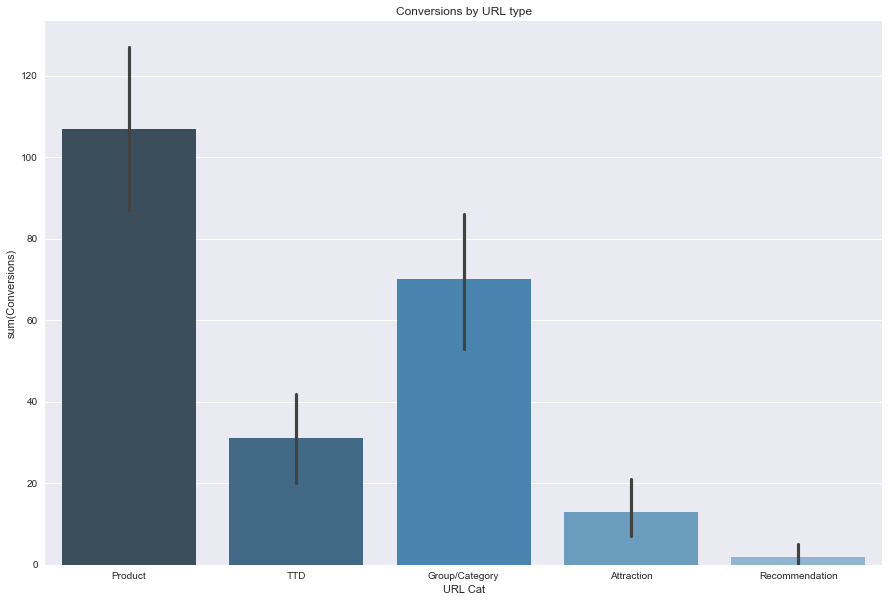

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x='URL Cat', y='Conversions', data=sqr, estimator=sum, palette='Blues_d').set_title('Conversions by URL type')

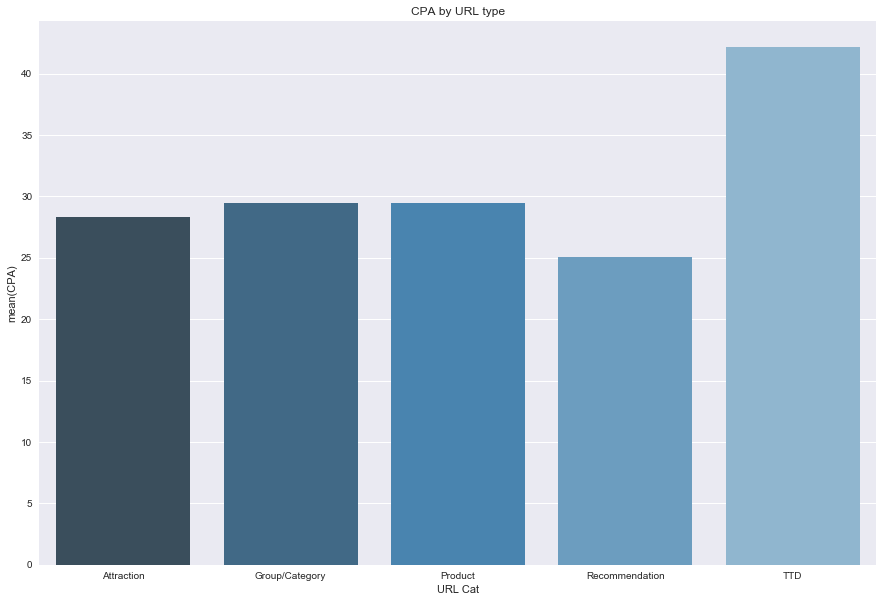

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x=summary.index, y='CPA', data=summary, palette='Blues_d').set_title('CPA by URL type')

In [26]:
summary

,Impressions,Clicks,Conversions,Cost,CPA,CVR
URL Cat,,,,,,
Attraction,12041,1298,13,368.47,28.343846,0.010015
Group/Category,36968,13342,70,2060.49,29.435571,0.005247
Product,49435,12473,107,3152.41,29.461776,0.008579
Recommendation,814,217,2,50.14,25.070000,0.009217
TTD,42333,9801,31,1306.93,42.159032,0.003163


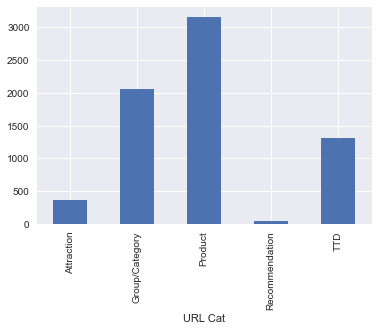

In [27]:
summary['Cost'].plot.bar()

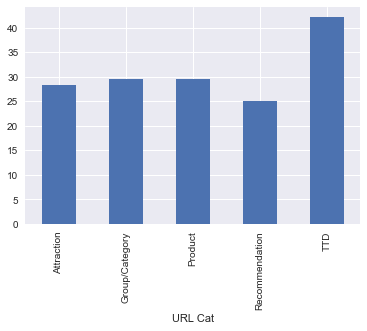

In [28]:
summary['CPA'].plot.bar()

# Code to analyse categories

In [17]:
def parseCat (str):
    if type(str) != float:
        arr = str.split('\n')
        return arr[0]
    else:
        return "No Cat"

# Category + URL type

In [102]:
sumCat = df[df['Cat1'] == 'españa'].groupby('URL Cat').sum()

In [106]:
df.head()

,Search term,Campaign,Added/Excluded,Dynamically generated Headline,Categories,Landing Page Title,URL,Ad group,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate,All conv.,URLtype,URL Cat,Cat1
0,excursiones en bahia brasil,Spanish - All Pages (DSA),None,10 mejores excursiones y tours en Salvador de ...,brasil\nbrasil/bahía\nbrasil/bahía/salvador de...,10 mejores excursiones y tours en Salvador de ...,https://es.viator.com/es/7380/Salvador-da-Bahi...,DSA - ttd Pages,5,6,0.8333,0.03,0.16,0,0.0,0.0,0,d818-ttd,TTD,brasil
1,excursiones en bahia brasil,Spanish - All Pages (DSA),None,10 mejores excursiones y tours en Salvador de ...,brasil\nbrasil/bahía\nbrasil/bahía/salvador de...,10 mejores excursiones y tours en Salvador de ...,https://es.viator.com/es/7380/Salvador-da-Bahi...,DSA - All Pages,4,6,0.6667,0.05,0.19,0,0.0,0.0,0,d818-ttd,TTD,brasil
2,castillo de bellver,Spanish - All Pages (DSA),None,Castillo de Bellver - Viator.com,españa\nespaña/islas baleares\nespaña/islas ba...,Castillo de Bellver,https://es.viator.com/es/7380/Mallorca-attract...,DSA - All Pages,1,3,0.3333,0.11,0.11,0,0.0,0.0,0,d955-a13274,Attraction,españa
3,castillo de bellver,Spanish - All Pages (DSA),None,Castillo de Bellver - Viator.com,españa\nespaña/islas baleares\nespaña/islas ba...,Castillo de Bellver,https://es.viator.com/es/7380/Mallorca-attract...,DSA - ttd Pages,1,1,1.0000,0.03,0.03,0,0.0,0.0,0,d955-a13274,Attraction,españa
4,aeropuerto de antigua guatemala,Spanish - All Pages (DSA),None,Llegadas: del aeropuerto de la ciudad de Guate...,guatemala\nguatemala/ciudad de guatemala\nguat...,Traslado compartido para llegadas: del aeropue...,https://es.viator.com/es/7380/tours/Guatemala-...,DSA - All Pages,1,5,0.2000,0.16,0.16,0,0.0,0.0,0,d4595-3022ANTAPTHTL,Product,guatemala


In [116]:
df[(df['Cat1'] == 'españa') | (df['Cat1'] == 'italia') | (df['Cat1'] == 'francia') | (df['Cat1'] == 'No Cat') | (df['Cat1'] == 'estados unidos')].pivot_table(values='Conversions' , index='Cat1' ,columns='URL Cat' , aggfunc='sum').fillna('-')

URL Cat,Attraction,Group/Category,Product,Recommendation,TTD
Cat1,,,,,
No Cat,0,3,13,0,3
españa,2,1,23,0,2
estados unidos,2,1,19,0,3
francia,1,3,14,0,2
italia,2,3,26,0,3


In [120]:
pt = df.pivot_table(values='Conversions' , index='Cat1' ,columns='URL Cat' , aggfunc='sum').fillna('0')